## Linear regression

$$
\large
\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}\ldots+\theta_{n}x_{n}
\\ \hat{y}\Rightarrow \text{Predicted value}\\
\\ n\Rightarrow \text{Number of features}\\
\\ x_{i}\Rightarrow \text{Is the }i^{th}\text{ feature}\\
\\ \theta_{j}\Rightarrow \text{Is the }j^{th}\text{ model parameter}
$$


### Vectorized Form


$$
\large
\mathbf{\hat{Y}}=\mathbf{\theta}\cdot\mathbf{X}\\
\mathbf{X}\Rightarrow \text{Instance vector x0 to xn. For x0 the value is always 1 (bias)}\\
\mathbf{\theta}\Rightarrow \text{Parameter vector. Including bias }\theta_{0}\text{ and feature weights}
$$

To train the model implies in find the parameters values that minimizes RMSE (Root mean square error) or MSE (mean square error)

### Normal Equation

There's a mathematical equation that gives the result of the parameters that minimizes MSE. This equation ua called *Normal Equation*

$$
\hat{\theta}=\left(X^{T}X\right)^{-1}X^{T}Y
$$

In [1]:
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [2]:
y = 4 + 3 * X + np.random.randn(m, 1) # column vector
y

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842],
       [ 5.03890908],
       [10.14821022],
       [ 8.46489564],
       [ 5.7873021 ],
       [ 5.18802735],
       [ 6.06907205],
       [ 5.12340036],
       [ 6.82087644],
       [ 6.19956196],
       [ 4.28385989],
       [ 7.96723765],
       [ 5.09801844],
       [ 5.75798135],
       [ 5.96358393],
       [ 5.32104916],
       [ 8.29041045],
       [ 4.85532818],
       [ 6.28312936],
       [ 7.3932017 ],
       [ 4.68275333],
       [ 9.53145501],
       [ 5.19772255],
       [ 4.64785995],
       [ 9.61886731],
       [ 7.87502098],
       [ 8.82387021],
       [ 5.88791282],
       [ 7.0492748 ],
       [ 7.91303719],
       [ 6.9424623 ],
       [ 4.69751764],
       [ 5.80238342],
       [ 5.34915394],
       [10.20785545],
       [ 6.34371184],
       [ 7

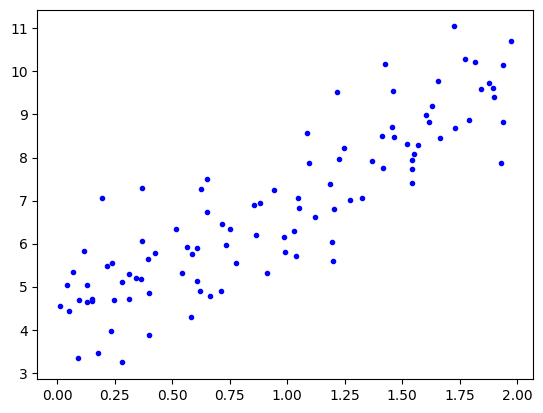

In [3]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.show()

Linear regression calculus with *Normal equation*

Using inv() function from NumPy's linear algebra to compute the inverse of matrix.
Use dummy feature to add x0=1 to each instance. (Bias value)

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [5]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # @ operator performs matrix multiplication
theta_best

array([[4.21509616],
       [2.77011339]])

Let's do some predictions using theta_best

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

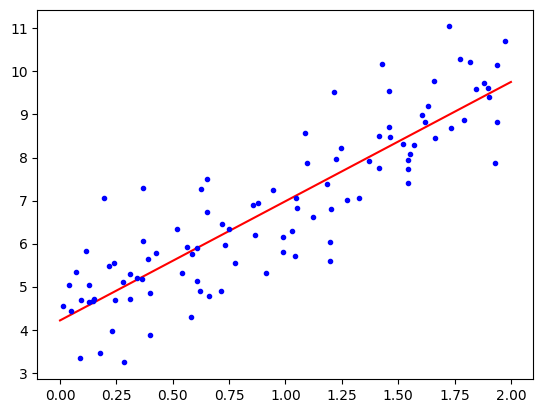

In [8]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

## Linear regression with Scikit-Learn

Now we gonna perform the linear regression with Scikit-Learn library

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # create a LinearRegression object
lin_reg.fit(X, y) # fit the model to the training data
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new) # make predictions - note that the input is a 2D array. No dummy feature needs to be added.

array([[4.21509616],
       [9.75532293]])

The LinearRegression class is based on the scipy.linalg.lstsq() function. [Function Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

This function uses the pseudoinverse of X the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)


In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [12]:
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [13]:
residuals

array([80.6584564])

Using the pseudoinverse is more efficient that computing the Normal equation. Plus it handle edge cases nicely: indeed, the Normal equation may not work if the matrix:

$$
X^{T}X
$$

Is not invertible, such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

Both the Normal equation and the SVD approach get very slow when the number of features grows large (e.g., 100,000). On the positive side, both are linear with regard to the number of instances in the training set (they are O(m)), so they handle large training sets efficiently, provided they can fit in memory.